In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

In [2]:
text = open("./Data/Origin/Description.txt","r").read()

In [3]:
dset = pd.read_csv("./Data/Origin/train.csv")
cat = dset.select_dtypes(exclude="number")
num = dset.select_dtypes(include="number")

In [4]:
dset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
print(text)

PassengerId* - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.*

*HomePlanet* - The planet the passenger departed from, typically their planet of permanent residence.*

*CryoSleep* - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.*

*Cabin* - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.*

*Destination* - The planet the passenger will be debarking to.*

*Age* - The age of the passenger.*

*VIP* - Whether the passenger has paid for special VIP service during the voyage.*

*RoomService, FoodCourt, ShoppingMall, Spa, VRDeck* - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.*

## Categorical Data Analysis

In [6]:
cat.describe()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


In [7]:
category = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']
nomial = ['PassengerId','Cabin','Name']

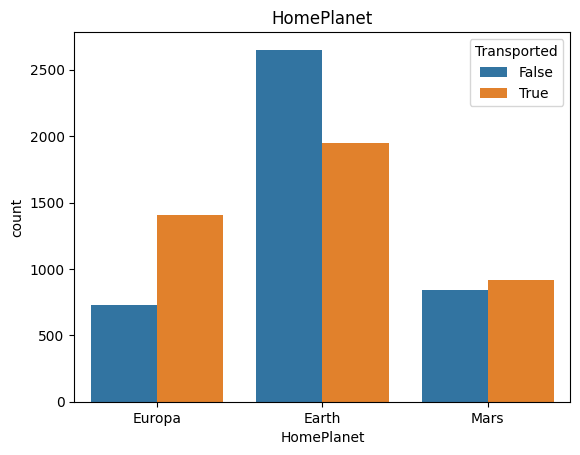

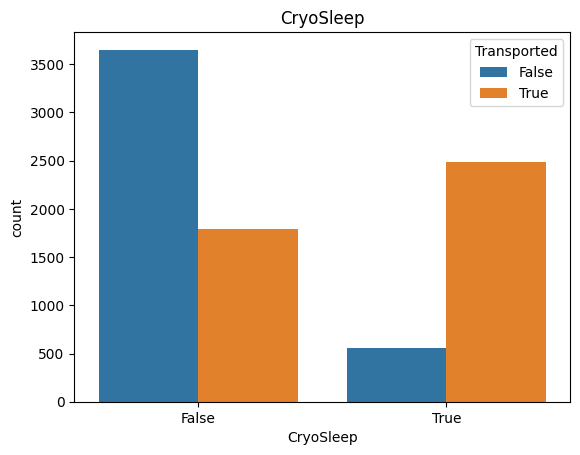

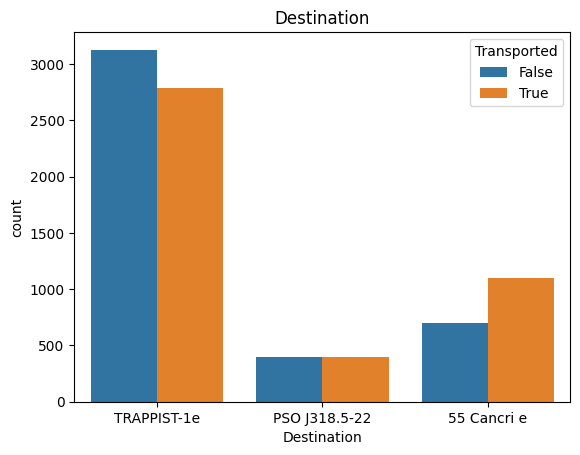

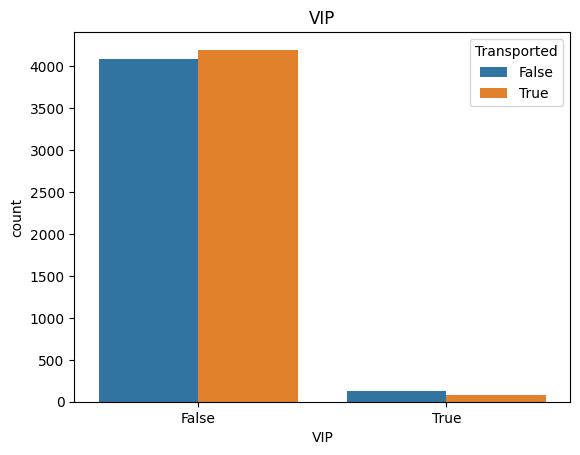

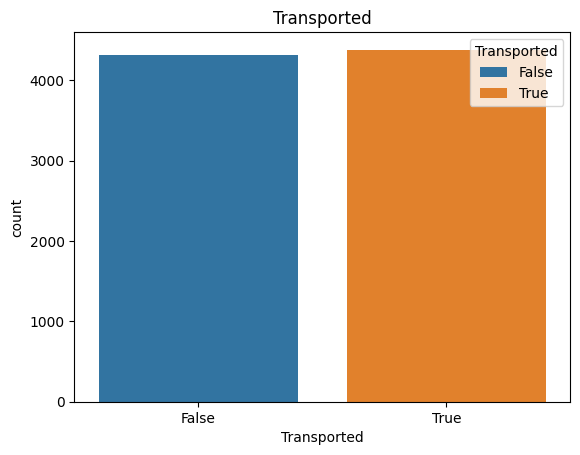

In [8]:
for i in category:
    sns.countplot(dset,x=i,hue="Transported")
    plt.title(i)
    plt.show()

- Target value is almost balanced.
- There is a direct relationship between CryoSleep and Target.

## Numeric Data Analysis

In [9]:
dset["TotalSpent"] = num["RoomService"] + num['FoodCourt'] + num["ShoppingMall"] + num["Spa"] + num["VRDeck"]
num = dset.select_dtypes(include="number")

In [10]:
num.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpent
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


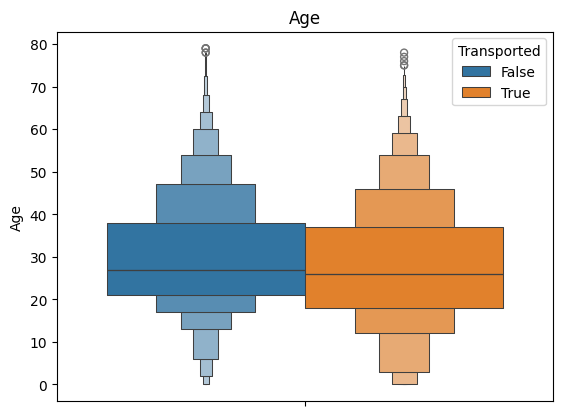

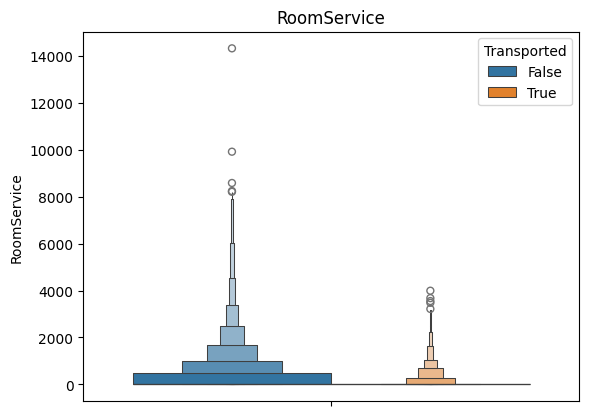

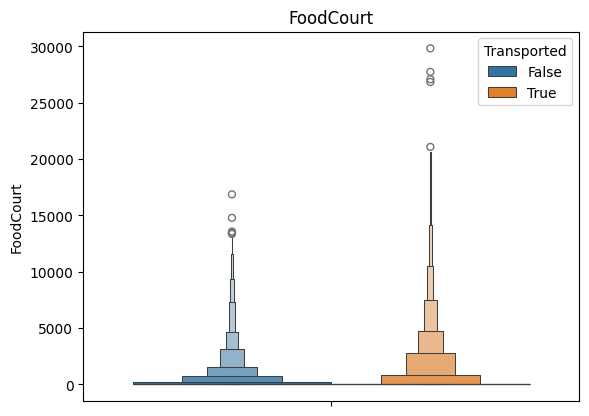

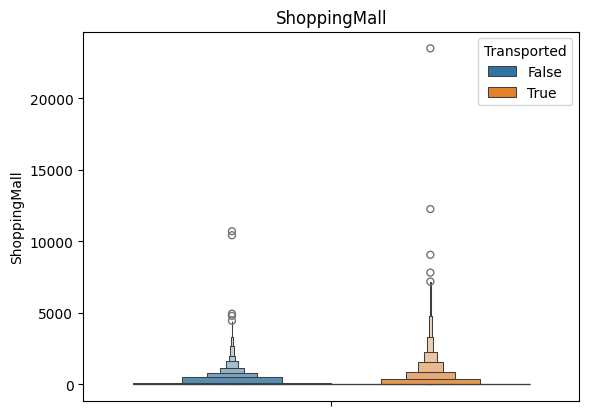

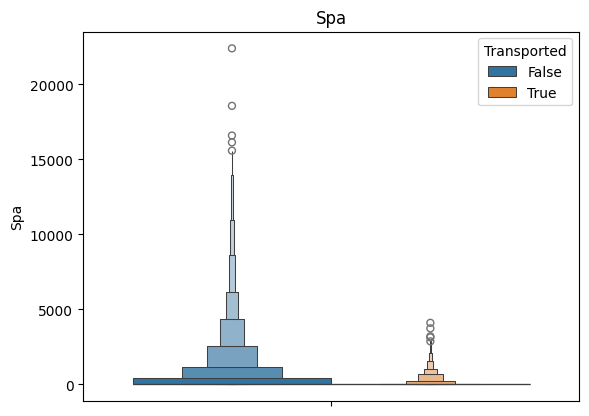

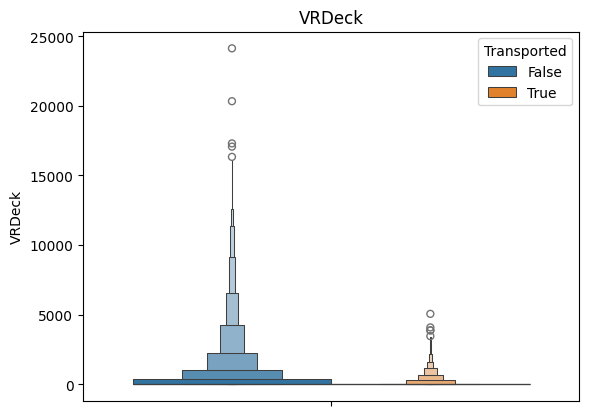

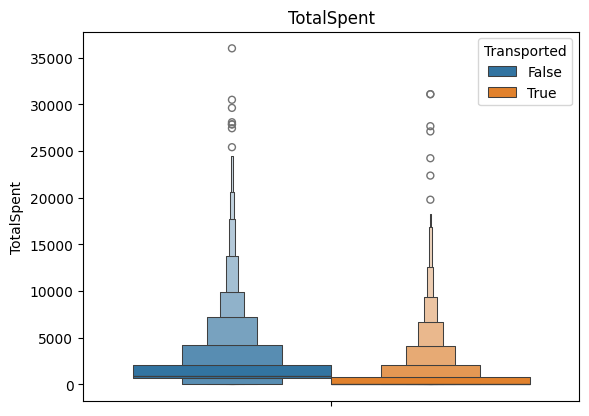

In [11]:
for i in num.columns:
    sns.boxenplot(y= num[i],hue= dset["Transported"])
    plt.title(i)
    plt.show()

- There is a sensible correlation on spent money and Transported

<Axes: >

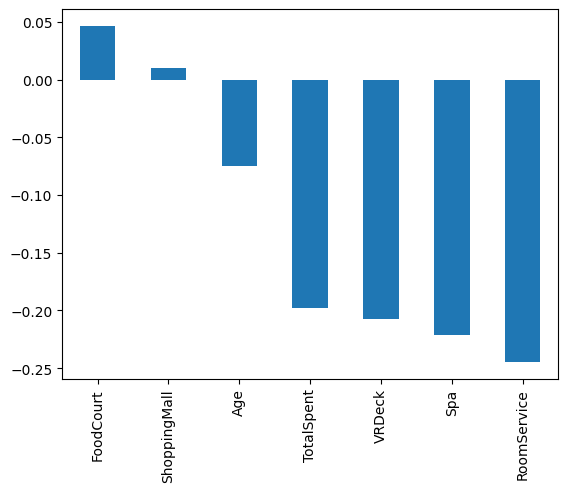

In [12]:
numerics = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpent','Transported']
dset[numerics].corr()["Transported"].sort_values(ascending=False)[1:].plot(kind="bar")

In [13]:
# Total spent equal 0 and CryoSlept (%)
dset[dset["TotalSpent"]==0]["CryoSleep"].sum()*100/len(dset[dset["TotalSpent"]==0])

82.84570372651679

In [14]:
# Total spent equal 0 and Transported (%)
dset[dset["TotalSpent"]==0]["Transported"].sum()*100/len(dset[dset["TotalSpent"]==0])

78.38004311672313

In [15]:
# breakup Cabin to  num, deck and sid Id - drop Cabin
def breakup_cabin(data):
    dset = data.copy()
    cabin_deck = dset["Cabin"].dropna().apply(lambda n : str(n).split("/")[0])
    cabin_num = dset["Cabin"].dropna().apply(lambda n : str(n).split("/")[1])
    cabin_side = dset["Cabin"].dropna().apply(lambda n : str(n).split("/")[2])
    
    dset["Cabin_Deck"] = cabin_deck
    dset["Cabin_Num"] = cabin_num.astype(int)
    dset["Cabin_Side"] = cabin_side
    dset = dset.drop("Cabin",axis=1)
    
    return dset

In [16]:
dset = breakup_cabin(dset)

<Axes: xlabel='Cabin_Deck', ylabel='count'>

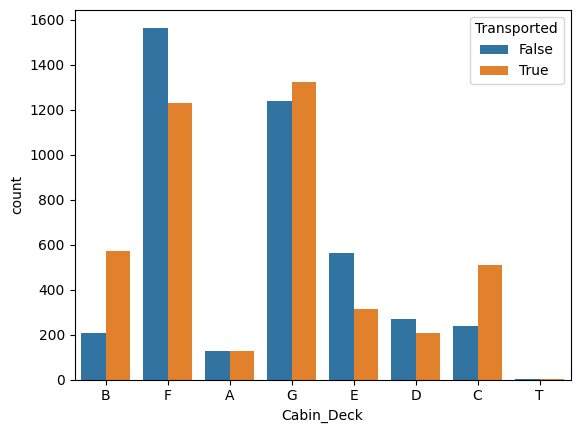

In [17]:
sns.countplot(dset,x="Cabin_Deck",hue="Transported")

<Axes: xlabel='Cabin_Side', ylabel='count'>

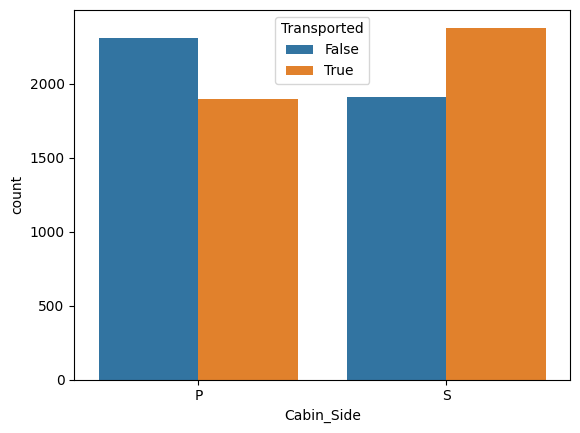

In [18]:
sns.countplot(dset,x="Cabin_Side",hue="Transported")

In [19]:
transported_deck = (dset[dset["Transported"]==True]["Cabin_Deck"].value_counts()*100/dset["Cabin_Deck"].value_counts()).sort_values(ascending=False)

<Axes: xlabel='Cabin_Deck', ylabel='count'>

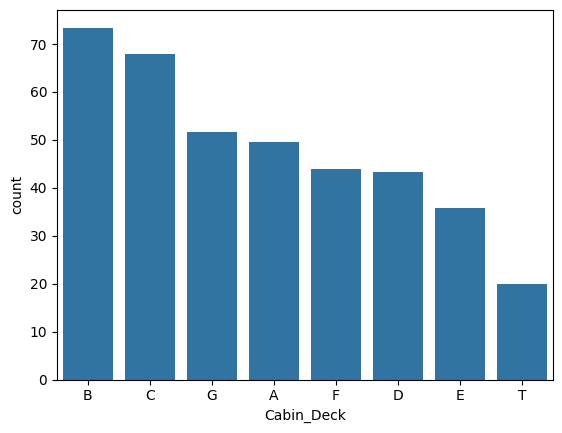

In [20]:
sns.barplot(transported_deck)

In [21]:
# Extract group number and person number from PassengerId - drop PassengerId
def extract_group_person(data):
    dset = data.copy()
    dset["Passenger_P"] = dset["PassengerId"].apply(lambda n: [int(k) for k in n.split("_")][1])
    dset["Passenger_G"] = dset["PassengerId"].apply(lambda n: [int(k) for k in n.split("_")][0])
    dset = dset.drop("PassengerId",axis=1)
    return dset

In [22]:
dset = extract_group_person(dset)

In [31]:
dset

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent,Cabin_Deck,Cabin_Num,Cabin_Side,Passenger_P,Passenger_G
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0.0,P,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0.0,S,1,2
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,A,0.0,S,1,3
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,A,0.0,S,2,3
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,F,1.0,S,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,A,98.0,P,1,9276
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,G,1499.0,S,1,9278
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,G,1500.0,S,1,9279
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,E,608.0,S,1,9280
